# Entrenamiento CNN CIFAR-10

In [36]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [37]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

### Obtención dataset CIFAR10

El conjunto de datos CIFAR10 contiene 60 000 imágenes en color en 10 clases, con 6000 imágenes en cada clase. El conjunto de datos se divide en 50 000 imágenes de entrenamiento y 10 000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay superposición entre ellas.

In [38]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [39]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 25

## Exploración

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


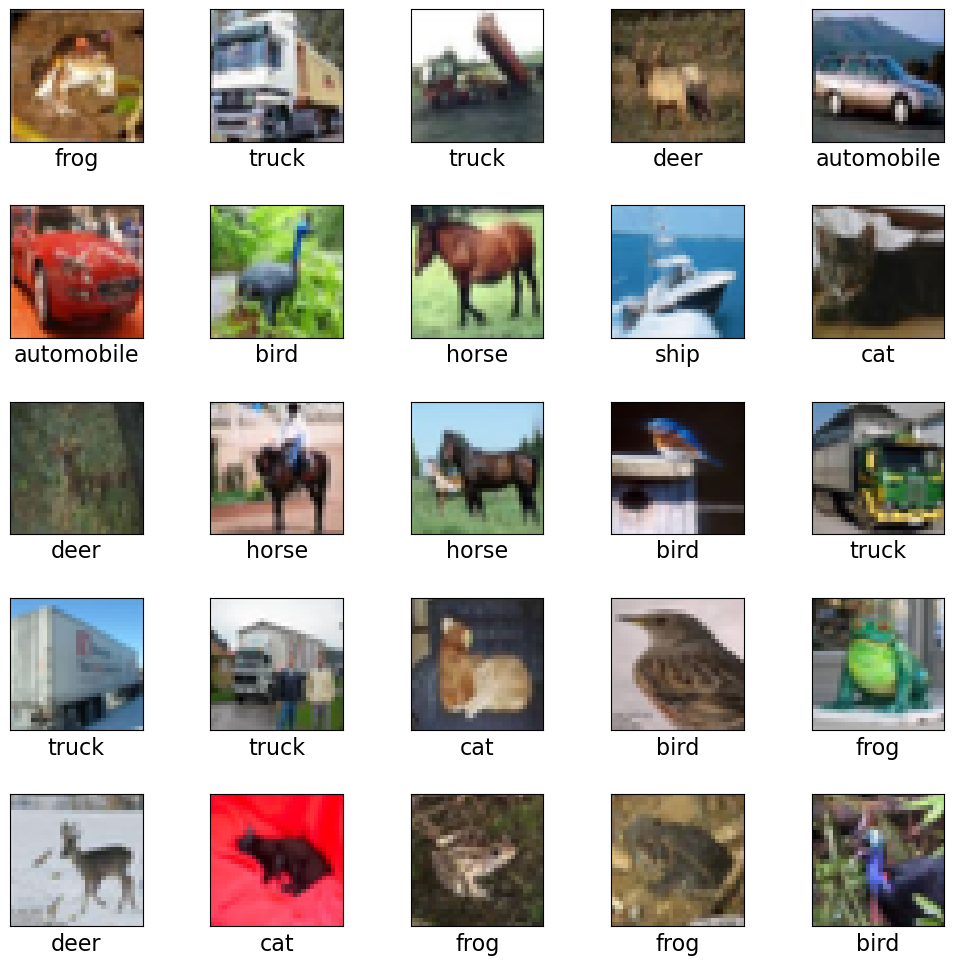

In [40]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
print(train_images.shape)

(50000, 32, 32, 3)


In [8]:
print(train_labels.shape)

(50000, 1)


In [9]:
print(test_images.shape)

(10000, 32, 32, 3)


In [10]:
print(test_labels.shape)

(10000, 1)


## Implementar arquitectura Fully Connected

In [ ]:
# Modelo
model = Sequencial()





In [ ]:
# Entrenamiento



In [ ]:
# Evaluacion



In [ ]:
# grafico loss/accuracy v/s epoch
# grafico loss/accuracy v/s epoch
plt.plot(, label='accuracy')
plt.plot(, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


## Implementar Arquitectura CNN

In [43]:
# Modelo
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten

#(train_images, train_labels), (test_images, test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
# Entrenamiento
history = model.fit(train_images, train_labels, epochs=20, batch_size=128,
                   verbose=2, validation_data=(test_images, test_labels))


MemoryError: Unable to allocate 1.14 GiB for an array with shape (50000, 32, 32, 3) and data type float64

In [49]:
# Evaluacionb
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)


NameError: name 'X_test' is not defined

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

NameError: name 'history' is not defined

In [ ]:
y_pred_clases = np.argmax(y_pred, axis=1)

In [ ]:
accuracy_score(y_test,y_pred_clases)

In [ ]:
# grafico loss/accuracy v/s epoch
plt.plot(, label='accuracy')
plt.plot(, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


